## Método de Ondas Planas

Programa para calcular la estructura de bandas de un cristal
Fotónico 1D por medio del método de ondas planas PWE  
Referencia: Photonics Crystals, Physics and practical modeling  
Igor A. Sukhoivanov and Igor V. Guryev

In [53]:
import numpy as np
import matplotlib.pyplot as plt

l1 = 0.5e-6
l2 = 0.5e-6

eps1 = 1
eps2 = 4

a = l1+l2
numG = 50

G  = np.arange(-numG* 2 * np.pi/a, numG * 2* np.pi/a, 2* np.pi/a)
G1 = np.arange(-numG* 2 * np.pi/a, numG * 2* np.pi/a, 2* np.pi/a)
chi = np.zeros((len(G),len(G1)),dtype = 'complex_')

for i in range(len(G)):
    for J in range(len(G1)):
        if(G[i] - G1[J]) == 0:
            chi[i,J] = 1/(l1+l2) * (1/eps1 * l1 + 1/eps2*l2)
        else:
            chi[i,J] = 1j /(l1+l2)/(G[i]-G1[J]) * (1/eps1 * np.exp(-1j * (G[i]-G1[J]) * l1) - 1) + 1/eps2 * (np.exp(-1j * (G[i]-G1[J]) * (l1+l2)) - np.exp(-1j * (G[i]-G1[J])*l1))


In [54]:
print(chi)
print(chi.shape)

[[ 6.25000000e-01+0.00000000e+00j  5.00000000e-01+3.18309886e-01j
  -1.29171273e-15-4.05803523e-15j ...  5.00000000e-01+3.28154522e-03j
  -1.34652501e-15-2.07281421e-13j  5.00000000e-01+3.21525137e-03j]
 [ 5.00000000e-01-3.18309886e-01j  6.25000000e-01+0.00000000e+00j
   5.00000000e-01+3.18309886e-01j ... -1.33883206e-15-2.01891118e-13j
   5.00000000e-01+3.28154522e-03j -1.34652501e-15-2.07281421e-13j]
 [-1.29171273e-15+4.05803523e-15j  5.00000000e-01-3.18309886e-01j
   6.25000000e-01+0.00000000e+00j ...  5.00000000e-01+3.35063038e-03j
  -1.33883206e-15-2.01891118e-13j  5.00000000e-01+3.28154522e-03j]
 ...
 [ 5.00000000e-01-3.28154522e-03j -1.33883206e-15+2.01891118e-13j
   5.00000000e-01-3.35063038e-03j ...  6.25000000e-01+0.00000000e+00j
   5.00000000e-01+3.18309886e-01j -1.29171273e-15-4.05803523e-15j]
 [-1.34652501e-15+2.07281421e-13j  5.00000000e-01-3.28154522e-03j
  -1.33883206e-15+2.01891118e-13j ...  5.00000000e-01-3.18309886e-01j
   6.25000000e-01+0.00000000e+00j  5.00000000e-

In [55]:
M = np.zeros((len(G),len(G1)),dtype = 'complex_')
ks = np.linspace(-2*np.pi/a, 2*np.pi/a,100)
Ks = list()
dispe = list()


In [56]:
for k in range(len(ks)):
    for i in range(len(G)):
        for j in range(len(G1)):
            M[j,i] = chi[j,i] * (ks[k] + G1[j]) * (ks[k] + G[i])
    V = np.linalg.eig(M)[0]
    dispe.append(np.sqrt(np.sort(np.abs(V))) * a/2/np.pi)
    Ks.append(ks[k] * a/np.pi)




In [57]:
print(dispe[0])

[1.04454793e-07 4.52416673e-01 6.25762404e-01 1.06068297e+00
 1.08420744e+00 1.53099717e+00 1.70358839e+00 2.12150387e+00
 2.16854189e+00 2.61003814e+00 2.78108131e+00 3.18261353e+00
 3.25313124e+00 3.68964975e+00 3.85826104e+00 4.24417174e+00
 4.33814233e+00 4.76989387e+00 4.93508967e+00 5.30640327e+00
 5.42369000e+00 5.85103229e+00 6.01155435e+00 6.36951131e+00
 6.51009924e+00 6.93306308e+00 7.08755274e+00 7.43391758e+00
 7.59739714e+00 8.01659885e+00 8.16300441e+00 8.49987460e+00
 8.68634129e+00 9.10145315e+00 9.23775642e+00 9.56827869e+00
 9.77670093e+00 1.01890513e+01 1.03116082e+01 1.06394040e+01
 1.08703420e+01 1.12788168e+01 1.13844389e+01 1.17153541e+01
 1.19664504e+01 1.23742537e+01 1.24559066e+01 1.27964240e+01
 1.30700619e+01 1.34741218e+01 1.35264130e+01 1.38886176e+01
 1.41795472e+01 1.45853398e+01 1.45995667e+01 1.49942355e+01
 1.53140114e+01 1.56604169e+01 1.57298743e+01 1.61481111e+01
 1.64887840e+01 1.67381100e+01 1.71978793e+01 1.77231028e+01
 1.87604514e+01 1.892173

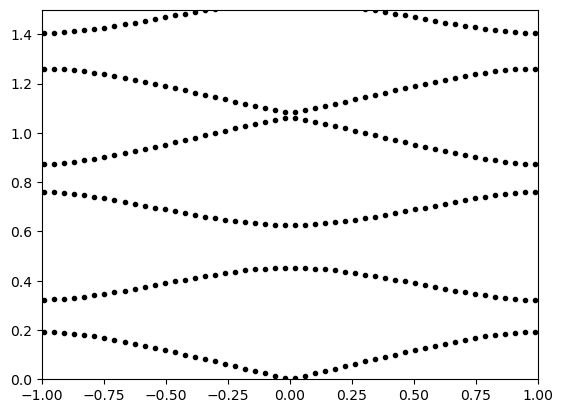

In [58]:
import matplotlib.pyplot as plt

for i in range(len(Ks)):
    plt.plot([Ks[i]] * len(dispe[i]), dispe[i],'.',color='black')
    plt.xlim([-1,1])
    plt.ylim([0,1.5])

## Campo Eléctrico

In [59]:
def Field(x):
    global a, numG, k, Vs, in1
    H = 0
    countt = 0
    for G in np.arange(-numG * 2 * np.pi / a, numG * 2 * np.pi / a + 0.0001, 2 * np.pi / a):
        countt += 1
        H += Vs[countt - 1, in1] * np.exp(1j * (k + G) * x)
    return H

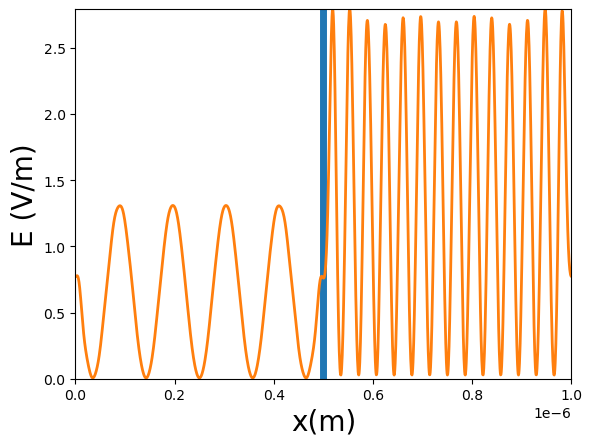

In [60]:
from scipy.linalg import eigh

def calculate_field(x, a, numG, k, Vs, in1):
    H = 0
    countt = 0
    for G in np.arange(-numG*2*np.pi/a, numG*2*np.pi/a, 2*np.pi/a):
        countt += 1
        H += Vs[countt,in1]*np.exp(1j*(k+G)*x)
    return H

k = np.pi/(15*a)
in1 = 20

countG1 = 1
countG = 1
M1 = np.zeros((2*numG+1, 2*numG+1), dtype=complex)

for G in np.arange(-numG*2*np.pi/a, numG*2*np.pi/a, 2*np.pi/a):
    for G1 in np.arange(-numG*2*np.pi/a, numG*2*np.pi/a, 2*np.pi/a):
        M1[countG1-1,countG-1] = chi[countG1-1,countG-1]*(k+G1)*(k+G)
        countG += 1
    countG1 += 1
    countG = 1

countG1 = 1

eigvals, eigvecs = eigh(M1)
ind = np.argsort(eigvals)
Ds = eigvals[ind]
Vs = eigvecs[:,ind]

freq = np.sqrt(abs(Ds[in1-1]))*a/2/np.pi

div = 15
div1 = 1500
x = np.linspace(0, a, div1+1)
FieldE = np.abs(calculate_field(x, a, numG, k, Vs, in1))**2

alt = np.max(np.abs(FieldE))
x1 = np.linspace(0, alt, div+1)
y1 = l1*np.ones(div+1)

plt.figure(2)
plt.plot(y1, x1, linewidth=5)
plt.plot(x, FieldE, linewidth=2)
plt.xlabel('x(m)', fontsize=20)
plt.ylabel('E (V/m)', fontsize=20)
plt.ylim([0, alt])
plt.xlim([0, a])
plt.show()
